1. **Анализ исторических данных**:
   - Вычислить **скользящее среднее** температуры с окном в 30 дней для сглаживания краткосрочных колебаний.
   - Рассчитать среднюю температуру и стандартное отклонение для каждого сезона в каждом городе.
   - Выявить аномалии, где температура выходит за пределы $ \text{среднее} \pm 2\sigma $.
   - Попробуйте распараллелить проведение этого анализа. Сравните скорость выполнения анализа с распараллеливанием и без него.


In [81]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [82]:
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv('temperature_data.csv')

In [84]:
temp_stats = df.groupby(['city', 'season'])['temperature'].agg(['mean', 'std']).reset_index()
temp_stats

,city,season,mean,std
0,Beijing,autumn,15.954149,4.667983
1,Beijing,spring,13.204211,4.962825
2,Beijing,summer,27.066877,4.806019
3,Beijing,winter,-1.908085,4.860638
4,Berlin,autumn,11.048188,5.173623
5,Berlin,spring,10.046156,4.742026
6,Berlin,summer,20.202998,5.188113
7,Berlin,winter,0.218367,5.069700
8,Cairo,autumn,24.904964,4.857764
9,Cairo,spring,24.968623,5.045888


In [85]:
df

,city,timestamp,temperature,season
0,New York,2010-01-01,-3.140920,winter
1,New York,2010-01-02,8.047362,winter
2,New York,2010-01-03,3.477991,winter
3,New York,2010-01-04,2.670440,winter
4,New York,2010-01-05,5.337611,winter
...,...,...,...,...
54745,Mexico City,2019-12-25,0.324462,winter
54746,Mexico City,2019-12-26,12.536842,winter
54747,Mexico City,2019-12-27,3.747502,winter
54748,Mexico City,2019-12-28,16.615874,winter


In [86]:
df['date'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d')
df = df.drop(columns=['timestamp'])

Вычислить **скользящее среднее** температуры с окном в 30 дней для сглаживания краткосрочных колебаний

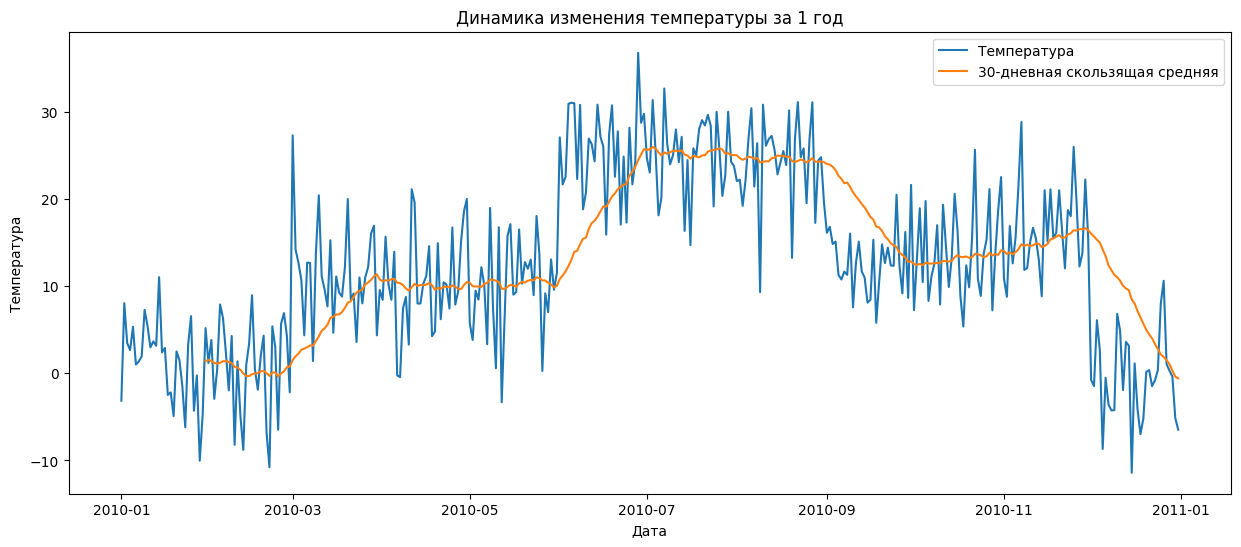

In [87]:
df['rolling_mean'] = df['temperature'].rolling(window=30).mean()

filtered_df = df.iloc[:365]
plt.figure(figsize=(15, 6)) 
plt.plot(filtered_df['date'], filtered_df["temperature"], label="Температура")
plt.plot(filtered_df['date'], filtered_df["rolling_mean"], label="30-дневная скользящая средняя")
plt.title("Динамика изменения температуры за 1 год") 
plt.xlabel("Дата")
plt.ylabel("Температура") 
plt.legend() 
plt.show()

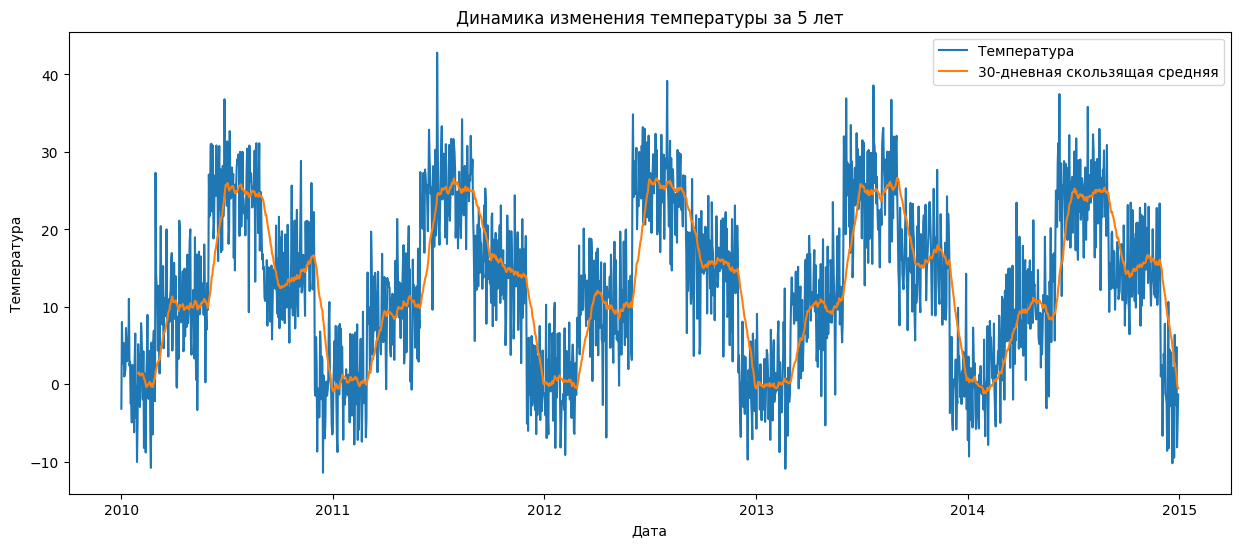

In [88]:
df['rolling_mean'] = df['temperature'].rolling(window=30).mean()

filtered_df = df.iloc[:365*5]
plt.figure(figsize=(15, 6)) 
plt.plot(filtered_df['date'], filtered_df["temperature"], label="Температура")
plt.plot(filtered_df['date'], filtered_df["rolling_mean"], label="30-дневная скользящая средняя")
plt.title("Динамика изменения температуры за 5 лет") 
plt.xlabel("Дата")
plt.ylabel("Температура") 
plt.legend() 
plt.show()

Рассчитать среднюю температуру и стандартное отклонение для каждого сезона в каждом городе.

In [89]:
temp_stats = df.groupby(['city', 'season'])['temperature'].agg(['mean', 'std']).reset_index()
temp_stats

,city,season,mean,std
0,Beijing,autumn,15.954149,4.667983
1,Beijing,spring,13.204211,4.962825
2,Beijing,summer,27.066877,4.806019
3,Beijing,winter,-1.908085,4.860638
4,Berlin,autumn,11.048188,5.173623
5,Berlin,spring,10.046156,4.742026
6,Berlin,summer,20.202998,5.188113
7,Berlin,winter,0.218367,5.069700
8,Cairo,autumn,24.904964,4.857764
9,Cairo,spring,24.968623,5.045888


Выявить аномалии, где температура выходит за пределы $ \text{среднее} \pm 2\sigma $ по всем записям

In [90]:
lower = df['temperature'].mean() - 2 * df['temperature'].std()
upper = df['temperature'].mean() + 2 * df['temperature'].std()
anomalies = df[(df['temperature'] < lower) | (df['temperature'] > upper)]
print("Аномалии по всем записям:")
anomalies

Аномалии по всем записям:


,city,temperature,season,date,rolling_mean
18,New York,-4.914320,winter,2010-01-19,NaN
22,New York,-6.189584,winter,2010-01-23,NaN
25,New York,-4.296240,winter,2010-01-26,NaN
27,New York,-10.027295,winter,2010-01-28,NaN
28,New York,-4.759833,winter,2010-01-29,NaN
...,...,...,...,...,...
50967,Cairo,42.093181,summer,2019-08-19,35.154055
50970,Cairo,43.756703,summer,2019-08-22,35.568126
50972,Cairo,42.609016,summer,2019-08-24,35.651016
50977,Cairo,40.382000,summer,2019-08-29,35.772570


Выявить аномалии, где температура выходит за пределы $ \text{среднее} \pm 2\sigma $ по городам и сезонам

In [91]:
import pandas as pd

df = pd.read_csv('temperature_data.csv')

In [92]:
df = df.merge(temp_stats, on=['city', 'season'], how='left')
df['lower'] = df['mean'] - 2 * df['std']
df['upper'] = df['mean'] + 2 * df['std']
anomalies = df[(df['temperature'] < df['lower']) | (df['temperature'] > df['upper'])]
print("Аномалии по городам и сезонам:")
anomalies

Аномалии по городам и сезонам:


,city,timestamp,temperature,season,mean,std,lower,upper
13,New York,2010-01-14,11.036334,winter,0.075130,4.712378,-9.349627,9.499886
27,New York,2010-01-28,-10.027295,winter,0.075130,4.712378,-9.349627,9.499886
51,New York,2010-02-21,-10.779288,winter,0.075130,4.712378,-9.349627,9.499886
59,New York,2010-03-01,27.309170,spring,10.148497,5.132753,-0.117008,20.414002
68,New York,2010-03-10,20.427047,spring,10.148497,5.132753,-0.117008,20.414002
...,...,...,...,...,...,...,...,...
54640,Mexico City,2019-09-11,3.993756,autumn,15.079615,5.033185,5.013244,25.145985
54657,Mexico City,2019-09-28,4.926339,autumn,15.079615,5.033185,5.013244,25.145985
54679,Mexico City,2019-10-20,28.482407,autumn,15.079615,5.033185,5.013244,25.145985
54717,Mexico City,2019-11-27,27.084958,autumn,15.079615,5.033185,5.013244,25.145985


Попробуйте распараллелить проведение этого анализа. Сравните скорость выполнения анализа с распараллеливанием и без него.

## Попытки распараллелить до того, как увидел описание в тг

Анализ без распараллеливания

In [93]:
import time


temp_df = df.drop(columns=['mean', 'std', 'lower', 'upper']).copy()

start_time = time.time()
temp_df['rolling_mean'] = temp_df['temperature'].rolling(window=30).mean()
temp_stats = temp_df.groupby(['city', 'season'])['temperature'].agg(['mean', 'std']).reset_index()
temp_df = pd.merge(temp_df, temp_stats, on=['city', 'season'], how='left')
temp_df['lower'] = temp_df['mean'] - 2 * temp_df['std']
temp_df['upper'] = temp_df['mean'] + 2 * temp_df['std']
anomalies = temp_df[(temp_df['temperature'] < temp_df['lower']) | (temp_df['temperature'] > temp_df['upper'])]
end_time = time.time()

print(f"Время выполнения без распараллеливания: {(end_time - start_time)*1000:.4f} миллисекунд")

Время выполнения без распараллеливания: 10.2053 миллисекунд


In [94]:
import dask.dataframe as dd

temp_df_dask = dd.from_pandas(df, npartitions=4)
temp_df_dask = temp_df_dask.drop(columns=['mean', 'std', 'lower', 'upper']).copy()


start_time_parallel = time.time()
temp_df_dask['rolling_mean'] = temp_df_dask['temperature'].rolling(window=30).mean()
temp_stats_dask = temp_df_dask.groupby(['city', 'season'])['temperature'].agg(['mean', 'std']).reset_index()
temp_df_dask = temp_df_dask.merge(temp_stats_dask, on=['city', 'season'], how='left')
temp_df_dask['lower'] = temp_df_dask['mean'] - 2 * temp_df_dask['std']
temp_df_dask['upper'] = temp_df_dask['mean'] + 2 * temp_df_dask['std']
anomalies = temp_df_dask[(temp_df_dask['temperature'] < temp_df_dask['lower']) | (temp_df_dask['temperature'] > temp_df_dask['upper'])]
anomalies = anomalies.compute()
end_time_parallel = time.time()

print(f"Время выполнения с распараллеливанием: {(end_time_parallel - start_time_parallel)*1000:.4f} миллисекунд")

Время выполнения с распараллеливанием: 74.6381 миллисекунд


In [95]:
import dask.dataframe as dd

temp_df = temp_df.drop(columns=['mean', 'std', 'lower', 'upper']).copy()
temp_df_dask = dd.from_pandas(temp_df, npartitions=4)

start_time_parallel = time.time()
temp_df_dask['rolling_mean'] = temp_df_dask['temperature'].rolling(window=30).mean()
temp_stats = temp_df_dask.groupby(['city', 'season'])['temperature'].agg(['mean', 'std']).reset_index()
temp_df_dask = dd.merge(temp_df_dask, temp_stats, on=['city', 'season'], how='left')
temp_df_dask['lower'] = temp_df_dask['mean'] - 2 * temp_df_dask['std']
temp_df_dask['upper'] = temp_df_dask['mean'] + 2 * temp_df_dask['std']
anomalies = temp_df_dask[(temp_df_dask['temperature'] < temp_df_dask['lower']) | (temp_df_dask['temperature'] > temp_df_dask['upper'])]
anomalies = anomalies.compute()

end_time_parallel = time.time()

print(f"Время выполнения с распараллеливанием: {(end_time_parallel - start_time_parallel)*1000:.4f} миллисекунд")

Время выполнения с распараллеливанием: 72.5420 миллисекунд


Теперь попробуем увеличить кол-во записей в 1000 раз

In [96]:
import numpy as np

temp_df = df.drop(columns=['mean', 'std', 'lower', 'upper']).copy()
temp_df = pd.concat([temp_df] * 1000, ignore_index=True)
np.random.seed(0)
temp_df['temperature'] = temp_df['temperature'] + np.random.normal(0, 5, temp_df.shape[0])
temp_df.to_csv('big_file.csv')

In [97]:
start_time = time.time()
temp_df['rolling_mean'] = temp_df['temperature'].rolling(window=30).mean()
temp_stats = temp_df.groupby(['city', 'season'])['temperature'].agg(['mean', 'std']).reset_index()
temp_df = pd.merge(temp_df, temp_stats, on=['city', 'season'], how='left')
temp_df['lower'] = temp_df['mean'] - 2 * temp_df['std']
temp_df['upper'] = temp_df['mean'] + 2 * temp_df['std']
anomalies = temp_df[(temp_df['temperature'] < temp_df['lower']) | (temp_df['temperature'] > temp_df['upper'])]
end_time = time.time()

print(f"Время выполнения без распараллеливания: {(end_time - start_time):.4f} cекунд")

Время выполнения без распараллеливания: 12.6490 cекунд


In [98]:
temp_df = temp_df.drop(columns=['mean', 'std', 'lower', 'upper']).copy()

In [99]:
temp_df_dask = dd.from_pandas(temp_df, npartitions=4)

start_time_parallel = time.time()
temp_df_dask['rolling_mean'] = temp_df_dask['temperature'].rolling(window=30).mean()
temp_stats = temp_df_dask.groupby(['city', 'season'])['temperature'].agg(['mean', 'std']).reset_index()
temp_df_dask = temp_df_dask.merge(temp_stats, on=['city', 'season'], how='left')
temp_df_dask['lower'] = temp_df_dask['mean'] - 2 * temp_df_dask['std']
temp_df_dask['upper'] = temp_df_dask['mean'] + 2 * temp_df_dask['std']
anomalies = temp_df_dask[(temp_df_dask['temperature'] < temp_df_dask['lower']) | (temp_df_dask['temperature'] > temp_df_dask['upper'])]
anomalies = anomalies.compute()
end_time_parallel = time.time()

print(f"Время выполнения с распараллеливанием: {(end_time_parallel - start_time_parallel):.4f} секунд")

Время выполнения с распараллеливанием: 9.2191 секунд


Первые итоги по распараллеливанию:

С помощью распараллеливания удалось увеличить скорость обработки около 30% (11 vs 7.6 cекунд), при обработке 54 млн строк.

## После того, как увидел описание в тг

In [100]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from joblib import Parallel, delayed


def analyze_city_data(city_data):
    city = city_data['city'].iloc[0]
    city_data['rolling_mean'] = city_data['temperature'].rolling(window=30).mean()
    city_data['rolling_std'] = city_data['temperature'].rolling(window=30).std()
    season_stats = city_data.groupby('season')['temperature'].agg(['mean', 'std']).reset_index()
    X = np.arange(len(city_data)).reshape(-1, 1)
    y = city_data['temperature'].values
    reg = LinearRegression().fit(X, y)
    trend_slope = reg.coef_[0]
    avg_temp = city_data['temperature'].mean()
    min_temp = city_data['temperature'].min()
    max_temp = city_data['temperature'].max()

    anomalies = city_data[(city_data['temperature'] < city_data['rolling_mean'] - 2 * city_data['rolling_std']) |
                          (city_data['temperature'] > city_data['rolling_mean'] + 2 * city_data['rolling_std'])]

    return {
        'city': city,
        'avg_temp': avg_temp,
        'min_temp': min_temp,
        'max_temp': max_temp,
        'season_profile': season_stats,
        'rolling_mean_std': city_data[['timestamp', 'temperature', 'rolling_mean', 'rolling_std']],
        'trend_slope': trend_slope,
        'anomalies': anomalies
    }

def analyze_all_cities(df):
    city_groups = [group for _, group in df.groupby('city')]
    
    results = []
    for group in city_groups:
        result = analyze_city_data(group)
        results.append(result)
    return results


def analyze_all_cities_parallel(df, n_jobs=4):
    city_groups = [group for _, group in df.groupby('city')]
    results = Parallel(n_jobs=n_jobs)(delayed(analyze_city_data)(group) for group in city_groups)
    
    return results

In [101]:
df = pd.read_csv('big_file.csv')

In [102]:
start_time = time.time()
results = analyze_all_cities(df)
end_time = time.time()

print(f"Время выполнения без распараллеливания: {(end_time - start_time)*1000:.4f} миллисекунд")

Время выполнения без распараллеливания: 12360.0869 миллисекунд


In [103]:
start_time_parallel = time.time()
results = analyze_all_cities_parallel(df, 10)
end_time_parallel = time.time()

print(f"Время выполнения с распараллеливанием: {(end_time_parallel - start_time_parallel)*1000:.4f} миллисекунд")

Время выполнения с распараллеливанием: 17439.4901 миллисекунд


Итоги по распараллеливанию:

С помощью распараллеливания не удалось увеличить скорость обработки.

2. **Мониторинг текущей температуры**:
   - Подключить OpenWeatherMap API для получения текущей температуры города. Для получения API Key (бесплатно) надо зарегистрироваться на сайте. Обратите внимание, что API Key может активироваться только через 2-3 часа, это нормально. Посему получите ключ заранее.
   - Получить текущую температуру для выбранного города через OpenWeatherMap API.
   - Определить, является ли текущая температура нормальной, исходя из исторических данных для текущего сезона.
   - Данные на самом деле не совсем реальные (сюрпрайз). Поэтому на момент эксперимента погода в Берлине, Каире и Дубае была в рамках нормы, а в Пекине и Москве аномальная. Протестируйте свое решение для разных городов.
   - Попробуйте для получения текущей температуры использовать синхронные и асинхронные методы. Что здесь лучше использовать?

Подключить OpenWeatherMap API для получения текущей температуры города.

In [104]:
with open('private_info/weather_api', 'r') as file:
    API_KEY = file.readline().strip()

In [105]:
import requests
import datetime

def get_season(response_dt):
    date_time = datetime.datetime.fromtimestamp(response_dt, tz=datetime.timezone.utc)
    month = date_time.month
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'autumn'
    
def get_cur_weather(API_KEY, city, lang='RU', units='metric') -> tuple[float, int]:
    lat_lon_url = f'http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={API_KEY}'
    lat_lon_res = requests.get(lat_lon_url)
    if lat_lon_res.status_code != 200:
        raise Exception(lat_lon_res.text)

    elif not lat_lon_res.json():
        raise Exception("Город не найден")

    lat = lat_lon_res.json()[0]['lat']
    lon = lat_lon_res.json()[0]['lon']

    # 3.0 не работает без привязки платежных средств
    # url = f'https://api.openweathermap.org/data/3.0/onecall?lat={lat}&lon={lon}&exclude=current&appid={API_KEY}'
    url = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API_KEY}&lang={lang}&units={units}'
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        cur_temp = data['main']['temp']
        response_season = get_season(data['dt'])
        return cur_temp, response_season
    else:
        raise Exception(response.text)

In [106]:
cur_moscow_temp, response_season = get_cur_weather(API_KEY, 'Moscow')
print(cur_moscow_temp, response_season)

-2.84 winter


Пример ошибочного запроса

In [107]:
# cur_moscow_temp, response_season = get_cur_weather(None, 'Moscow')
# print(cur_moscow_temp, response_season)

In [108]:
df = pd.read_csv('temperature_data.csv')

In [109]:
def check_norm_city_temp(city, df, season_str, cur_temp):
    city_data = df[df['city'] == city]
    season_stats = city_data.groupby(['city', 'season'])['temperature'].agg(['mean', 'std']).reset_index()
    season_mean = season_stats[season_stats['season'] == season_str]['mean'].values[0]
    season_std = season_stats[season_stats['season'] == season_str]['std'].values[0]
    lower = season_mean - 2 * season_std
    upper = season_mean + 2 * season_std
    if lower <= cur_temp <= upper:
        print(f"Текущая температура {cur_temp}°C для города {city} нормальная для сезона {season_str}.")
    else:
        print(f"Текущая температура {cur_temp}°C для города {city} аномальная для сезона {season_str}.")

In [110]:
check_norm_city_temp('Moscow', df, response_season, cur_moscow_temp)

Текущая температура -2.84°C для города Moscow нормальная для сезона winter.


In [111]:
df['city'].unique()

array(['New York', 'London', 'Paris', 'Tokyo', 'Moscow', 'Sydney',
       'Berlin', 'Beijing', 'Rio de Janeiro', 'Dubai', 'Los Angeles',
       'Singapore', 'Mumbai', 'Cairo', 'Mexico City'], dtype=object)

In [112]:
start_sync_time = time.time()
for city in df['city'].unique():
    cur_temp, response_season = get_cur_weather(API_KEY, city)
    check_norm_city_temp(city, df, response_season, cur_temp)
end_sync_time = time.time()
print(f'Время синхронной обработки запросов: {(end_sync_time - start_sync_time):.4f} секунд')

Текущая температура -6.01°C для города New York нормальная для сезона winter.
Текущая температура 7.2°C для города London нормальная для сезона winter.
Текущая температура 4.92°C для города Paris нормальная для сезона winter.
Текущая температура 3.74°C для города Tokyo нормальная для сезона winter.
Текущая температура -2.84°C для города Moscow нормальная для сезона winter.
Текущая температура 21.09°C для города Sydney нормальная для сезона winter.
Текущая температура 4.14°C для города Berlin нормальная для сезона winter.
Текущая температура -9.06°C для города Beijing нормальная для сезона winter.
Текущая температура 25.07°C для города Rio de Janeiro нормальная для сезона winter.
Текущая температура 21.02°C для города Dubai нормальная для сезона winter.
Текущая температура 17.08°C для города Los Angeles нормальная для сезона winter.
Текущая температура 26.69°C для города Singapore нормальная для сезона winter.
Текущая температура 24.03°C для города Mumbai нормальная для сезона winter.
Т

In [113]:
import aiohttp
import asyncio


async def get_lat_lon(city, API_KEY, session):
    lat_lon_url = f'http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={API_KEY}'
    async with session.get(lat_lon_url, timeout=10) as lat_lon_res:
        if lat_lon_res.status != 200:
            raise Exception(lat_lon_res.text)
        data = await lat_lon_res.json()
        if not data:
            raise Exception("Город не найден")
        lat = data[0]['lat']
        lon = data[0]['lon']
        return lat, lon
        
async def get_weather(lat, lon, API_KEY, session):
    url = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API_KEY}&units=metric'
    async with session.get(url, timeout=10) as response:
        if response.status != 200:
            raise Exception(response.text)
        data = await response.json()
        cur_temp = data['main']['temp']
        response_season = get_season(data['dt'])
        return cur_temp, response_season

async def get_async_weather(city, df, API_KEY, session):
    lat, lon = await get_lat_lon(city, API_KEY, session)
    cur_temp, season_str = await get_weather(lat, lon, API_KEY, session)
    check_norm_city_temp(city, df, season_str, cur_temp)

async def check_weather_async(API_KEY, df):
    cities = df['city'].unique()
    async with aiohttp.ClientSession() as session:
        tasks = [get_async_weather(city, df, API_KEY, session) for city in cities]
        await asyncio.gather(*tasks)


df = pd.read_csv('temperature_data.csv')

start_async_time = time.time()
await check_weather_async(API_KEY, df)
end_async_time = time.time()
print(f'Время aсинхронной обработки запросов: {(end_async_time - start_async_time):.4f} секунд')


Текущая температура 21.02°C для города Dubai нормальная для сезона winter.
Текущая температура 4.14°C для города Berlin нормальная для сезона winter.
Текущая температура 7.15°C для города London нормальная для сезона winter.
Текущая температура 24.03°C для города Mumbai нормальная для сезона winter.
Текущая температура 4.92°C для города Paris нормальная для сезона winter.
Текущая температура 26.69°C для города Singapore нормальная для сезона winter.
Текущая температура 19.94°C для города Mexico City нормальная для сезона winter.
Текущая температура 21.09°C для города Sydney нормальная для сезона winter.
Текущая температура 17.33°C для города Cairo нормальная для сезона winter.
Текущая температура 25.07°C для города Rio de Janeiro нормальная для сезона winter.
Текущая температура 16.97°C для города Los Angeles нормальная для сезона winter.
Текущая температура -9.06°C для города Beijing нормальная для сезона winter.
Текущая температура 3.74°C для города Tokyo нормальная для сезона winter

Пример ошибки

In [114]:
# await check_weather_async(None)
# print(cur_moscow_temp, response_season)

### Итоги:
Асинхронный вызов сервисов в данном случае позволил повысить скорость обработки в 10 раз (с 9 сек. до 0.9 сек)